In [1]:
#### definir los 6 cromosomas de forma aleatoria con los valores dados
po = 6 #Número de individuos por población
pm = 0.15 #Probabilidad de mutación
pc = 0.9 #Probabilidad de cruzamiento
GenMax = 100 #Número de generaciones máx
Cantidad_objetos = 20
Peso_minimo = 20 #kilogramos
Peso_maximo = 200 #kilogramos
#### Definimos el valor de esos objetos (aleatoriamente)
valor_minimo = 100 #euros
valor_maximo = 1200 #euros
Peso_maximo_mochila = 800 #kilogramos


In [2]:
import random as rd
import numpy as np
import pandas as pd

In [3]:
#individuos=[]
#i=0
#while i < 6:
#    cromosoma = []
#    peso_Total = 0
#    j=0
#    while j < 10:
#        j+=1
#        peso = rd.randint(Peso_minimo, Peso_maximo)
#        valor = rd.randint(valor_minimo, valor_maximo)
#        cromosoma.append([peso,valor])
#        peso_Total+=peso
#    if peso_Total < Peso_maximo_mochila:
#        individuos.append(cromosoma)    
#    else: 
#        i-=1
#    i+=1
#individuos   

In [4]:
pesos = rd.sample(range(20,200),Cantidad_objetos)
valores = rd.sample(range(100,1200),Cantidad_objetos)

In [5]:
#generar poblaciones de 6 individuos 
individuos = []
while len(individuos) < 6:
    g = rd.choices([0,1],k=Cantidad_objetos)
    peso_cromosoma = np.dot(g,pesos)
    if peso_cromosoma < Peso_maximo_mochila:
        individuos.append(g)
individuos

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]]

In [6]:
#Ordenamos mediante la tecnica del torneo
individuos

[[0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0],
 [1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0],
 [0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 1, 0],
 [1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1],
 [0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0],
 [0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]]

In [7]:
df = pd.DataFrame(individuos)
fitnes= df.apply(lambda row: np.dot(row,valores),axis=1)
peso_mochilla = df.apply(lambda row: np.dot(row,pesos),axis=1)
df['fitnes_mochilla']=fitnes
df['peso_mochilla']=peso_mochilla
df

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,fitnes_mochilla,peso_mochilla
0,0,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,3490,619
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,4965,781
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,3995,576
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,2784,390
4,0,0,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,0,4998,646
5,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,5579,742


In [8]:
df.sort_values(by='fitnes_mochilla', ascending=False)

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,fitnes_mochilla,peso_mochilla
5,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,5579,742
4,0,0,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,0,4998,646
1,1,0,0,0,1,0,1,0,1,0,...,0,1,0,0,1,0,1,0,4965,781
2,0,0,0,0,0,1,1,0,0,0,...,1,0,0,1,0,0,1,0,3995,576
0,0,0,0,0,0,0,0,0,1,0,...,1,0,1,1,0,0,1,0,3490,619
3,1,1,0,0,0,0,0,0,0,0,...,0,1,0,0,1,0,0,1,2784,390


In [9]:
padre1 = df.sample(3).sort_values(by='fitnes_mochilla', ascending=False).head(1)
padre1

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,fitnes_mochilla,peso_mochilla
5,0,1,1,0,1,0,1,0,0,1,...,0,1,0,0,0,0,0,1,5579,742


In [10]:
padre2 = df.sample(3).sort_values(by='fitnes_mochilla', ascending=False).head(1)
padre2

,0,1,2,3,4,5,6,7,8,9,...,12,13,14,15,16,17,18,19,fitnes_mochilla,peso_mochilla
4,0,0,1,0,0,1,1,1,0,1,...,0,1,0,0,1,0,0,0,4998,646


In [11]:
corte = rd.randint(0,9)
corte

4

In [12]:
padre1_array = list(np.array(padre1.drop(columns=["fitnes_mochilla","peso_mochilla"]))[0])
padre1_array

[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [13]:
padre2_array = list(np.array(padre2.drop(columns=["fitnes_mochilla","peso_mochilla"]))[0])
padre2_array

[0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0]

In [14]:
#cruzamiento binario por varios cortes

In [15]:
def cruzamiento_padres_varios_cortes(padre1,padre2):    
    lista = list(range(1,Cantidad_objetos-1))
    varios_cortes= rd.sample(lista,2)
    hijo1_varios= padre1[:min(varios_cortes)] + padre2[min(varios_cortes):max(varios_cortes)] + padre1[max(varios_cortes):]
    hijo2_varios= padre2[:min(varios_cortes)] + padre1[min(varios_cortes):max(varios_cortes)] + padre2[max(varios_cortes):]
    return hijo1_varios, hijo2_varios

In [16]:
#cruzamiento binario siple
def cruzamiento_padres_simple(padre1,padre2):    
    corte = rd.randint(0,9)
    hijo1_simple = padre1_array[:corte]+ padre2_array[corte:]
    hijo2_simple = padre2_array[:corte]+ padre1_array[corte:]
    return hijo1_simple, hijo2_simple

In [17]:
#mutacion cromosoma binaria
def mutacion(hijo_lista):
    hijo_lista = hijo_lista.copy()
    for i in range(len(hijo_lista)):
        probabilidad_mutacion = rd.random()
        if(probabilidad_mutacion < pm):
            if(hijo_lista[i] == 0):
                hijo_lista[i] = 1
            else:
                hijo_lista[i] = 0
    return hijo_lista

In [18]:
def seleccion_padres(poblacion):
    df_poblacion = pd.DataFrame(poblacion)
    fitnes= df_poblacion.apply(lambda row: np.dot(row,valores),axis=1)
    df_poblacion['fitnes_mochilla']=fitnes
    padre1 = list(np.array(df_poblacion.sample(3).sort_values(by='fitnes_mochilla', ascending=False).head(1).drop(columns=["fitnes_mochilla"]))[0])
    padre2 = list(np.array(df_poblacion.sample(3).sort_values(by='fitnes_mochilla', ascending=False).head(1).drop(columns=["fitnes_mochilla"]))[0])
    return padre1, padre2

In [19]:
def validar_peso_cromosoma(cromosoma):
    if(np.dot(cromosoma,pesos)<Peso_maximo_mochila):
        return True
    else:
        return False

In [20]:
def encontrar_mejor_cromosoma(poblacion):
    index = 0
    val_max = 0
    for i in range(len(poblacion)):
        if(val_max < np.dot(poblacion[i],valores)):
            index = i
            val_max = np.dot(poblacion[i],valores)
    return poblacion[i],val_max


In [21]:
def encontrar_peor_cromosoma(poblacion):
    index = 0
    val_min = 0
    for i in range(len(poblacion)):
        if val_min == 0:
            val_min = np.dot(poblacion[i],valores)
        if(val_min > np.dot(poblacion[i],valores)):
            index = i
            val_min = np.dot(poblacion[i],valores)
    return index

print(encontrar_peor_cromosoma(individuos))

3


In [22]:
individuos_old = individuos.copy()
mejor_fitnes = []
for i in range(500):
    p1,p2 = seleccion_padres(individuos)
    pc_rd = rd.random()
    if(pc_rd < pc):
        h1,h2 = cruzamiento_padres_simple(p1,p2)
        mh1 = mutacion(h1)
        mh2 = mutacion(h2)
        if(validar_peso_cromosoma(mh1)):
            #estrategia de sustitución
            s1 = encontrar_peor_cromosoma(individuos)
            individuos[s1]=mh1
        if(validar_peso_cromosoma(mh2)):
            #estrategia de sustitución
            s2 = encontrar_peor_cromosoma(individuos)
            individuos[s2]=mh2
    cromosoma, valor = encontrar_mejor_cromosoma(individuos)
    mejor_fitnes.append([cromosoma, valor])        
print(np.array(individuos_old))
print(np.array(individuos))
print(mejor_fitnes)

[[0 0 0 0 0 0 0 0 1 0 1 0 1 0 1 1 0 0 1 0]
 [1 0 0 0 1 0 1 0 1 0 0 0 0 1 0 0 1 0 1 0]
 [0 0 0 0 0 1 1 0 0 0 0 1 1 0 0 1 0 0 1 0]
 [1 1 0 0 0 0 0 0 0 0 0 0 0 1 0 0 1 0 0 1]
 [0 0 1 0 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 0]
 [0 1 1 0 1 0 1 0 0 1 1 1 0 1 0 0 0 0 0 1]]
[[0 0 1 0 0 0 1 1 0 1 1 1 1 1 0 0 0 0 1 1]
 [0 0 1 0 1 0 1 0 0 1 0 1 1 1 0 0 0 0 1 1]
 [0 1 1 0 0 0 1 0 0 1 1 0 0 1 0 0 0 0 1 1]
 [0 0 0 0 0 1 1 1 0 1 1 1 1 1 0 0 1 0 0 1]
 [0 0 0 1 0 1 1 1 0 1 0 1 0 1 0 0 1 0 0 1]
 [0 1 1 0 1 0 1 1 0 1 0 1 1 1 0 1 1 0 0 1]]
[[[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5579], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5579], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5893], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5893], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5893], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1], 5893], [[0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1]

In [23]:
fitnes_array = [i[1] for i in mejor_fitnes]

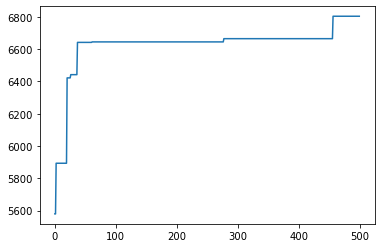

In [24]:
import matplotlib.pyplot as plt
plt.plot(fitnes_array)
plt.show()